<a href="https://colab.research.google.com/github/wiktoriaszmidt/lecture1/blob/main/pum4_regresja_todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zaczytanie niezbędnych bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

zaczytaj dane dotyczace sprzedazy

In [ ]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-14-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [ ]:
#sprawdż typy danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
# Zmiana etykiet na zmienne liczbowe
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == object:  # Sprawdź, czy kolumna zawiera dane typu tekstowego
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

print("Dane po zmianie etykiet na zmienne liczbowe:")
print(df.head())


Dane po zmianie etykiet na zmienne liczbowe:
    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


In [ ]:
# Uzupełnienie brakujących danych
for column in df.columns:
  if df[column].isnull().any():
    if df[column].dtype == 'object':
      df[column].fillna(df[column].mode()[0], inplace=True)  # Uzupełnienie najczęściej występującą wartością
    else:
      df[column].fillna(df[column].mean(), inplace=True)  # Uzupełnienie średnią wartością


<ipython-input-17-8e7cc4a25af5>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # Uzupełnienie średnią wartością


Podziel zbiór danych na testowy i treningowy w stosunku 30/70

In [ ]:
X = df.drop('Salary', axis=1)  # Zmienne niezależne (wszystkie kolumny oprócz 'Salary')
y = df['Salary']  # Zmienna zależna ('Salary')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Rozmiar zbioru treningowego:", X_train.shape, y_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape, y_test.shape)


Rozmiar zbioru treningowego: (262, 5) (262,)
Rozmiar zbioru testowego: (113, 5) (113,)


Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)


ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Przewidywanie na zbiorze testowym
y_pred = regressor.predict(X_test)

# Obliczanie miar oceny modelu
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Wyświetlanie wyników
print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")
print(f"Coefficient of determination (R²): {r2:.2f}")

Mean squared error (MSE): 251384617.98
Mean absolute error (MAE): 10976.82
Coefficient of determination (R²): 0.88


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

In [ ]:
print(df.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


In [ ]:

# Sprawdzenie korelacji między zmiennymi
correlation_matrix = df.corr()
print("Macierz korelacji:")
print(correlation_matrix)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ponowne stworzenie modelu regresji liniowej po normalizacji
regressor = LinearRegression().fit(X_train, y_train)


Macierz korelacji:
                          Age    Gender  Education Level  Job Title  \
Age                  1.000000 -0.019865         0.546020   0.116616   
Gender              -0.019865  1.000000         0.008677   0.041562   
Education Level      0.546020  0.008677         1.000000   0.127791   
Job Title            0.116616  0.041562         0.127791   1.000000   
Years of Experience  0.979128  0.002818         0.573355   0.099299   
Salary               0.922335  0.069498         0.650507   0.135033   

                     Years of Experience    Salary  
Age                             0.979128  0.922335  
Gender                          0.002818  0.069498  
Education Level                 0.573355  0.650507  
Job Title                       0.099299  0.135033  
Years of Experience             1.000000  0.930338  
Salary                          0.930338  1.000000  


Zbuduj model regresji odpornej i przetestuj jego predykcje

Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

HuberRegressor - Mean squared error (MSE): 236919186.39
HuberRegressor - Mean absolute error (MAE): 10782.23
HuberRegressor - Coefficient of determination (R²): 0.89


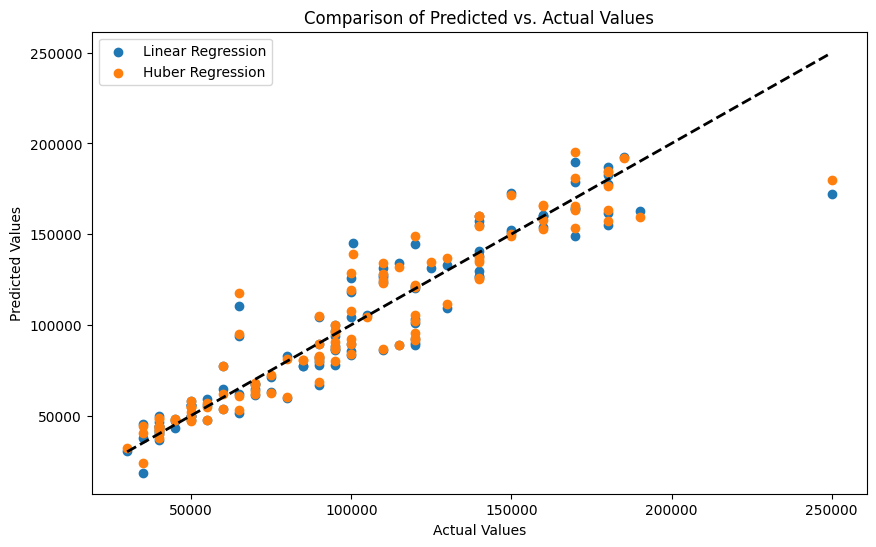

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor

# Stwórz model regresji odpornej (HuberRegressor)
huber_regressor = HuberRegressor().fit(X_train, y_train)

# Przewidywanie na zbiorze testowym za pomocą modelu regresji odpornej
y_pred_huber = huber_regressor.predict(X_test)

# Obliczanie miar oceny modelu regresji odpornej
mse_huber = mean_squared_error(y_test, y_pred_huber)
mae_huber = mean_absolute_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

# Wyświetlanie wyników dla regresji odpornej
print(f"HuberRegressor - Mean squared error (MSE): {mse_huber:.2f}")
print(f"HuberRegressor - Mean absolute error (MAE): {mae_huber:.2f}")
print(f"HuberRegressor - Coefficient of determination (R²): {r2_huber:.2f}")


# Wykres porównujący przewidziane i faktyczne wartości dla obu modeli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, y_pred_huber, label='Huber Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs. Actual Values')
plt.legend()
plt.show()


Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

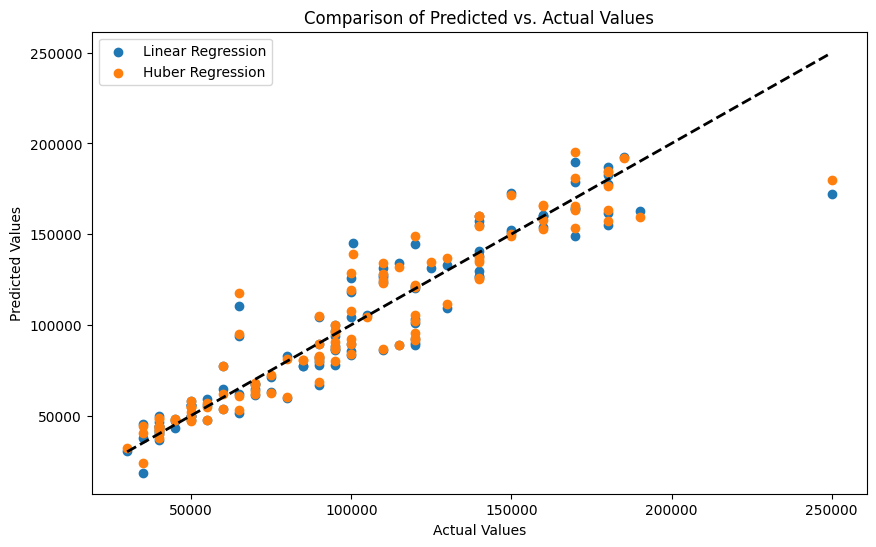

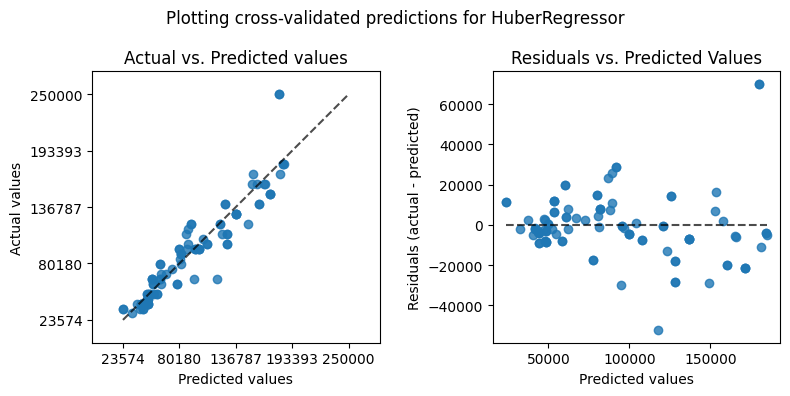

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import PredictionErrorDisplay

# Wykres porównujący przewidziane i faktyczne wartości dla obu modeli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, y_pred_huber, label='Huber Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs. Actual Values')
plt.legend()
plt.show()


# Wybierz model z lepszym wynikiem (np. HuberRegressor, jeśli ma niższy MSE)
if mse_huber < mse:
  y_pred = y_pred_huber
  model_name = "HuberRegressor"
else:
  model_name = "Linear Regression"

# Wizualizacja wyniku lepszego modelu
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle(f"Plotting cross-validated predictions for {model_name}")
plt.tight_layout()
plt.show()
